# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Gathering

In [2]:
df = pd.read_csv("simple_loan_data.csv.xls")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# checking for null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# droping the null values
df = df.dropna()

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

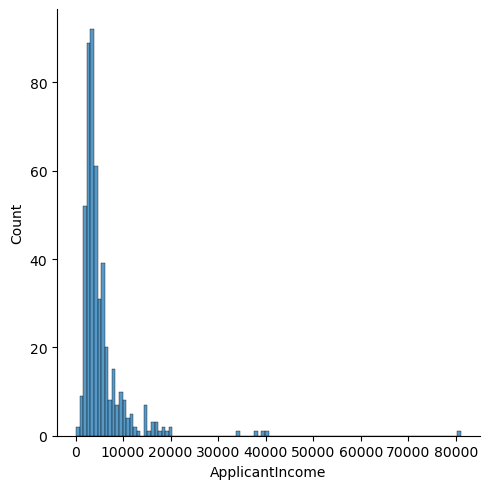

In [9]:
sns.displot(df["ApplicantIncome"])

<Axes: >

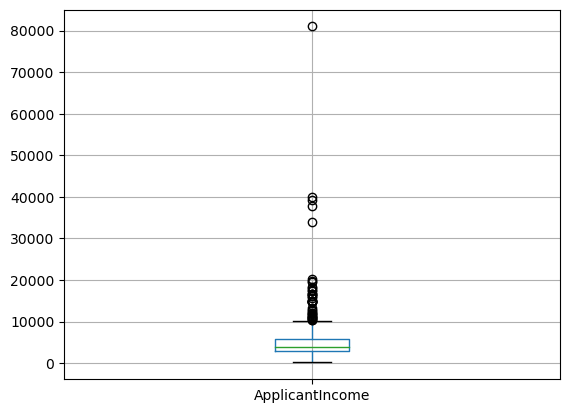

In [10]:
df.boxplot(column="ApplicantIncome")

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

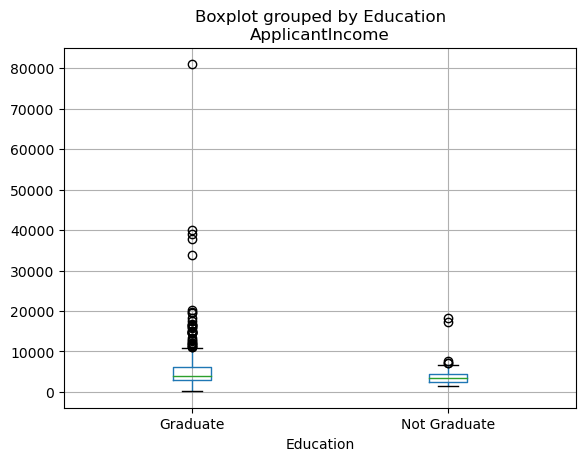

In [11]:
df.boxplot(column="ApplicantIncome", by="Education")

<Axes: xlabel='Gender', ylabel='count'>

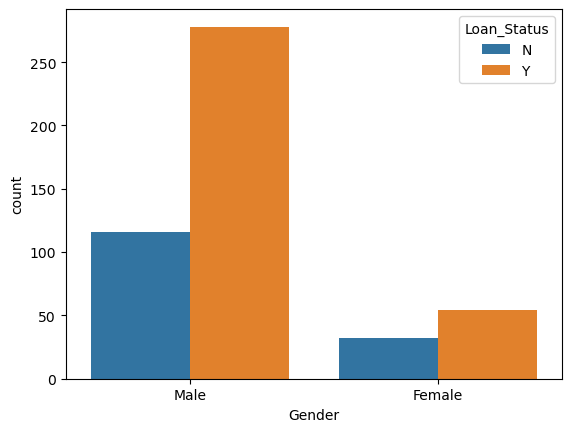

In [12]:
# Gender & Loan_Status 
sns.countplot(x="Gender", hue="Loan_Status", data=df)

<Axes: xlabel='Education', ylabel='count'>

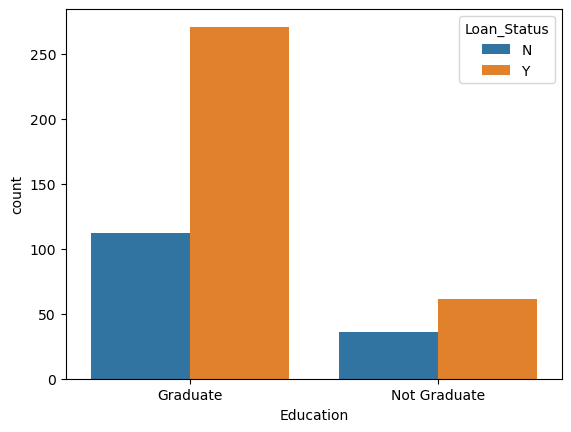

In [13]:
# Education & Loan_Status
sns.countplot(x="Education", hue="Loan_Status", data=df)

<Axes: xlabel='Married', ylabel='count'>

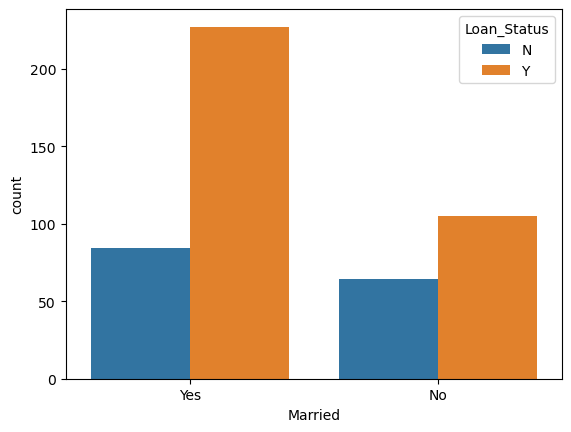

In [14]:
# Married & Loan Status
sns.countplot(x="Married", hue="Loan_Status", data=df)

# Label Encoding

#### Categorical to Numerical Values

In [15]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
# Loan_Status
df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [17]:
# Gender
df.replace({"Gender":{"Male":1,"Female":0}}, inplace=True)

In [18]:
# Married
df.replace({"Married":{"Yes":1,"No":0}},inplace=True)

In [19]:
# Self_Employed
df.replace({"Self_Employed":{"Yes":1,"No":0}},inplace=True)

In [20]:
# Property_Area
df.replace({"Property_Area":{"Rural":0,"Urban":1,"Semiurban":2}},inplace=True)

In [21]:
# Education
df.replace({"Education":{"Graduate":1,"Not Graduate":0}}, inplace=True)

In [22]:
# Dependent Column Values
df["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [23]:
# replacing the value 3+ to 4
df = df.replace(to_replace={"3+":4})

In [24]:
df["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


#### Separating Independent and Dependent Variables

In [26]:
x = df.drop(["Loan_ID", "Loan_Status"],axis=1)
y = df["Loan_Status"]

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2, stratify=y)

In [28]:
x_train.shape

(384, 11)

In [29]:
x_test.shape

(96, 11)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr_model = LogisticRegression()

In [32]:
lr_model.fit(x_train, y_train)

LogisticRegression()

#### Model Evaluation

In [160]:
# Testing data Evaluation

ypred_test_lr= lr_model.predict(x_test)

cf_matrix_lr = confusion_matrix(y_test,ypred_test_lr)
print("Confurion Matrix:\n", cf_matrix_lr)

print( )

accuracy_test_lr = accuracy_score(y_test,ypred_test_lr)
print("Accuracy:", accuracy_test_lr)

print()

clf_report_lr = classification_report(y_test,ypred_test_lr)
print("Classification Report:\n", clf_report_lr)

Confurion Matrix:
 [[15 15]
 [ 5 61]]

Accuracy: 0.7916666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        30
           1       0.80      0.92      0.86        66

    accuracy                           0.79        96
   macro avg       0.78      0.71      0.73        96
weighted avg       0.79      0.79      0.78        96



In [161]:
# Training data Evaluation

ypred_train_lr = lr_model.predict(x_train)

cf_matrix_lr = confusion_matrix(y_train,ypred_train_lr)
print("Confurion Matrix:\n", cf_matrix_lr)

print( )

accuracy_train_lr = accuracy_score(y_train,ypred_train_lr)
print("Accuracy:", accuracy_train_lr)

print()

clf_report_lr = classification_report(y_train,ypred_train_lr)
print("Classification Report:\n", clf_report_lr)

Confurion Matrix:
 [[ 48  70]
 [ 18 248]]

Accuracy: 0.7708333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.41      0.52       118
           1       0.78      0.93      0.85       266

    accuracy                           0.77       384
   macro avg       0.75      0.67      0.69       384
weighted avg       0.76      0.77      0.75       384



# SVM

In [62]:
from sklearn import svm

In [63]:
svm_model = svm.SVC(kernel="linear")

In [64]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

#### Model Evaluation

In [162]:
# Testing data Evaluation

ypred_test_svm = svm_model.predict(x_test)

cf_matrix_svm= confusion_matrix(y_test,ypred_test_svm)
print("Confurion Matrix:\n", cf_matrix_svm)

print( )

accuracy_test_svm = accuracy_score(y_test,ypred_test_svm)
print("Accuracy:", accuracy_test_svm)

print()

clf_report_svm = classification_report(y_test,ypred_test_svm)
print("Classification Report:\n", clf_report_svm)

Confurion Matrix:
 [[11 19]
 [ 2 64]]

Accuracy: 0.78125

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.37      0.51        30
           1       0.77      0.97      0.86        66

    accuracy                           0.78        96
   macro avg       0.81      0.67      0.69        96
weighted avg       0.79      0.78      0.75        96



In [163]:
# Training data Evaluation

ypred_train_svm = svm_model.predict(x_train)

cf_matrix_svm = confusion_matrix(y_train,ypred_train_svm)
print("Confurion Matrix:\n", cf_matrix_svm)

print( )

accuracy_train_svm = accuracy_score(y_train,ypred_train_svm)
print("Accuracy:", accuracy_train_svm)

print()

clf_report_svm = classification_report(y_train,ypred_train_svm)
print("Classification Report:\n", clf_report_svm)

Confurion Matrix:
 [[ 42  76]
 [ 12 254]]

Accuracy: 0.7708333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.36      0.49       118
           1       0.77      0.95      0.85       266

    accuracy                           0.77       384
   macro avg       0.77      0.66      0.67       384
weighted avg       0.77      0.77      0.74       384



# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [75]:
dt_model = DecisionTreeClassifier()

In [76]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

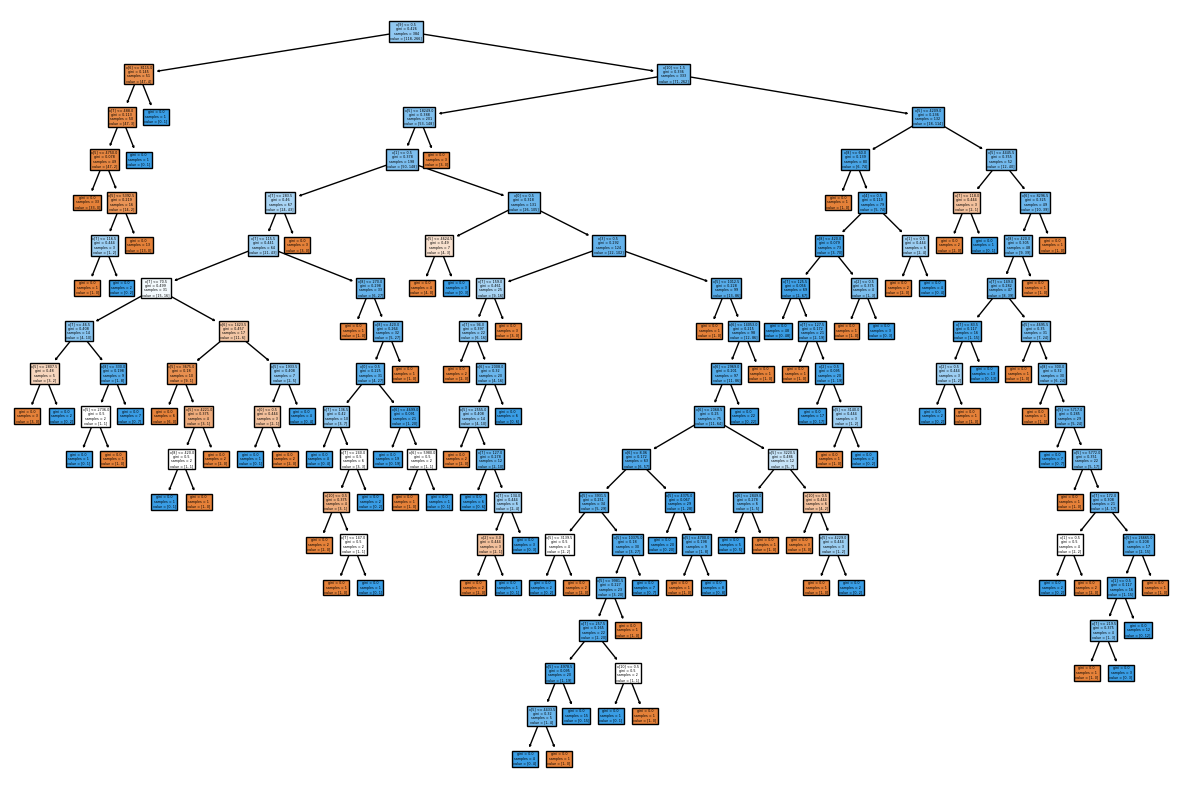

In [147]:
plt.figure(figsize=[15,10])
tree = plot_tree(dt_model, filled=True)

In [164]:
# Testing data Evaluation

ypred_test_dt = dt_model.predict(x_test)

cf_matrix_dt = confusion_matrix(y_test,ypred_test_dt)
print("Confurion Matrix:\n", cf_matrix_dt)

print( )

accuracy_test_dt = accuracy_score(y_test,ypred_test_dt)
print("Accuracy:", accuracy_test_dt)

print()

clf_report_dt = classification_report(y_test,ypred_test_dt)
print("Classification Report:\n", clf_report_dt)

Confurion Matrix:
 [[20 10]
 [16 50]]

Accuracy: 0.7291666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61        30
           1       0.83      0.76      0.79        66

    accuracy                           0.73        96
   macro avg       0.69      0.71      0.70        96
weighted avg       0.75      0.73      0.74        96



In [165]:
# Training data Evaluation

ypred_train_dt = dt_model.predict(x_train)

cf_matrix_dt = confusion_matrix(y_train,ypred_train_dt)
print("Confurion Matrix:\n", cf_matrix_dt)

print( )

accuracy_train_dt = accuracy_score(y_train,ypred_train_dt)
print("Accuracy:", accuracy_train_dt)

print()

clf_report_dt = classification_report(y_train,ypred_train_dt)
print("Classification Report:\n", clf_report_dt)

Confurion Matrix:
 [[118   0]
 [  0 266]]

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       266

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



### Hyperparameter Tuning

GridSearchCV

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
parameters = {"criterion":["gini","entropy"],
             "max_depth":[2,3,4,5,6,7,None]} 

In [168]:
gscv = GridSearchCV(dt_model, param_grid=parameters)

In [169]:
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, None]})

In [170]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [171]:
dt_gscv = gscv.best_score_   # Accuracy after Hyperparameter-Tuning
dt_gscv

0.804647983595352

# Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf_model = RandomForestClassifier()

In [123]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [172]:
# Testing data Evaluation

ypred_test_rf = rf_model.predict(x_test)

cf_matrix_rf = confusion_matrix(y_test,ypred_test_rf)
print("Confurion Matrix:\n", cf_matrix_rf)

print( )

accuracy_test_rf = accuracy_score(y_test,ypred_test_rf)
print("Accuracy:", accuracy_test_rf)

print()

clf_report_rf = classification_report(y_test,ypred_test_rf)
print("Classification Report:\n", clf_report_rf)

Confurion Matrix:
 [[18 12]
 [ 5 61]]

Accuracy: 0.8229166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.84      0.92      0.88        66

    accuracy                           0.82        96
   macro avg       0.81      0.76      0.78        96
weighted avg       0.82      0.82      0.82        96



In [173]:
# Training data Evaluation

ypred_train_rf = rf_model.predict(x_train)

cf_matrix_rf = confusion_matrix(y_train,ypred_train_rf)
print("Confurion Matrix:\n", cf_matrix_rf)

print( )

accuracy_train_rf = accuracy_score(y_train,ypred_train_rf)
print("Accuracy:", accuracy_train_rf)

print()

clf_report_rf = classification_report(y_train,ypred_train_rf)
print("Classification Report:\n", clf_report_rf)

Confurion Matrix:
 [[118   0]
 [  0 266]]

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       266

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



### Hyperparameter Tuning

In [174]:
rf_parameters = {"criterion":["gini", "entropy"],
                "n_estimators":[20,60,100,120],
                "max_features":["auto","sqrt", "log2", None],
                "max_depth":[2,4,6,8, None],
                "max_samples":[2,4,6,8]}

In [175]:
rf_gscv = GridSearchCV(estimator=rf_model, param_grid=parameters)

In [176]:
rf_gscv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, None]})

In [177]:
rf_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [178]:
rf_gscv = rf_gscv.best_score_   # Accuracy after Hyperparameter-Tuning
rf_gscv

0.8072453861927548

### Printing Accuracies

In [182]:
print("Logistic_Regression:", accuracy_test_lr*100)
print("Support_Vector_Machine:",accuracy_test_svm*100)
print("Decision_Tree:",dt_gscv*100)
print("Random_Forest:",rf_gscv*100)

Logistic_Regression: 79.16666666666666
Support_Vector_Machine: 78.125
Decision_Tree: 80.4647983595352
Random_Forest: 80.72453861927548
